# Credit Card Fraud Detection

Burada Credit Card Fraud Detection veri setini inceleyip, daha sonrasında veri setindeki dengesizlikle başa çıkabilmek için veri setine çeşitli yöntemler uygulayacağız.

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import itertools

# import ml libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, roc_auc_score, roc_curve

# close warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
# verisetinin okunması
data = pd.read_csv('C:/Users/HAZAL/OneDrive/Masaüstü/Projeler/creditcard_fraud_detection/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# time ve amount değişkenlerini standartlaştırma
rob_scaler = RobustScaler()
data['Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [5]:
# Hold out yöntemiyle verisetini eğitim ve test olarak ayırma
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [6]:
# create model
model = LogisticRegression(random_state=123456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.999


Accuracy sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır.
Modelin doğruluk skoru 0.999. Modelimiz mükemmel çalışıyor diyebiliriz, değil mi?

Performansını incelemek için birde Confusion Matrix’ine bakalım.

#### Confusion Matrix
- Bir sınıflandırma modelinin gerçek değerlerinin test verisi üzerindeki performansını açıklamak için kullanılan bir tablodur.
- Sınıflandırma algoritmalarının performansını değerlendirmek ve anlamak için kullanılan bir metrik ve görselleştirme aracıdır.

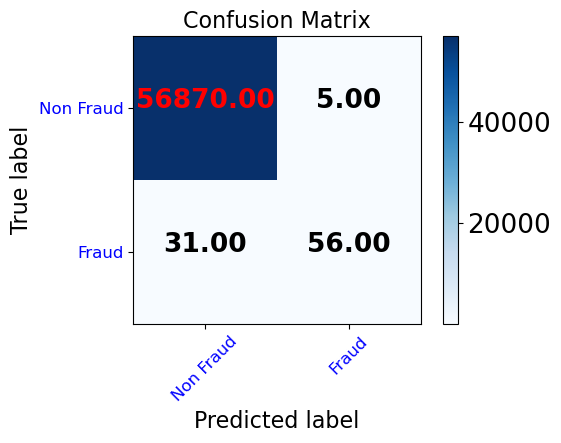

In [7]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Matplotlib'in font boyutunu günceller
    plt.rcParams.update({'font.size': 19})
    
    # Karışıklık matrisini görselleştirir
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontdict={'size':'16'})  # Görselin başlığı
    plt.colorbar()  # Renk skalası
    
    # Eksen işaretlerini oluşturur
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12, color='blue')  # X ekseni işaretleri
    plt.yticks(tick_marks, classes, fontsize=12, color='blue')  # Y ekseni işaretleri
    
    # Font özelliklerini belirler
    rc('font', weight='bold')
    
    # Karışıklık matrisindeki değerleri gösterir
    fmt = '.2f'  # Formatlama için kullanılan sayı formatı
    thresh = cm.max() / 2.  # Renklendirme eşiği, renklerin değişeceği değer
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")  # Eşiği aşan değerleri kırmızı, aşmayanları siyah renkte gösterir
        
    plt.ylabel('True label', fontdict={'size':'16'})  # Y ekseni etiketi
    plt.xlabel('Predicted label', fontdict={'size':'16'})  # X ekseni etiketi
    plt.tight_layout()

# Confusion matrix'i oluşturup görselleştirir
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Non Fraud', 'Fraud'],
                     title='Confusion Matrix')


In [8]:
# Sınıflandırma Raporu
# sınıflandırma problemlerinde modelin performansını ayrıntılı bir şekilde değerlendirmek için kullanılan bir rapor sağlar. 
# Bu rapor, doğruluk (accuracy), hassasiyet (precision), duyarlılık (recall), F1 skoru ve sınıflara özgü diğer ölçümleri içerir. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.92      0.64      0.76        87

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



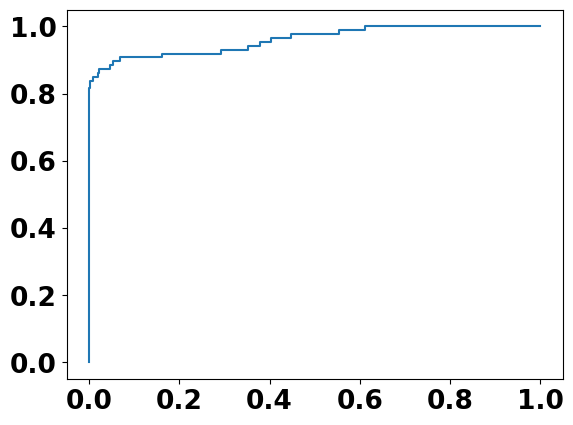

In [9]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

In [10]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

AUC ROC Curve with Area Under the curve = 0.961


Not : ROC eğrisinin (AUC) altındaki alan, genel sınıflandırma performansını değerlendirir. AUC, bir sınıfa diğerine daha fazla önem vermediğinden, azınlık sınıfını iyi yansıtmamaktadır.

### Resampling
Yeniden örnekleme(Resampling), azınlık sınıfına yeni örnekler ekleyerek veya çoğunluk sınıfından örnekler çıkarılarak veri setinin daha dengeli hale getirilmesidir.

### Oversampling
Azınlık sınıfına ait örneklerin kopyalanmasıyla veri setini dengeler.


#### Random Oversampling:
- Azınlık sınıfından rastgele seçilen örneklerin eklenmesiyle veri setinin dengelenmesidir.
- Veri setiniz küçükse bu teknik kullanılabilinir.
- Overfitting’e neden olabilir.

In [11]:
# random oversampling önce eğitim setindeki sınıf sayısı
y_train.value_counts()

0    227440
1       405
Name: Class, dtype: int64

In [12]:
# Random Oversampling uygulanamsı(Eğitim setine uygulanıyor)
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)

In [13]:
# Random Oversampling'ten sonra eğitim setinin sınıf sayısı
y_randomover.value_counts()

0    227440
1    227440
Name: Class, dtype: int64

In [14]:
# Modelin eğitilmesi ve başarı oranı
model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accurarcy: %.3f%%" % (accuracy))

Accurarcy: 0.976%


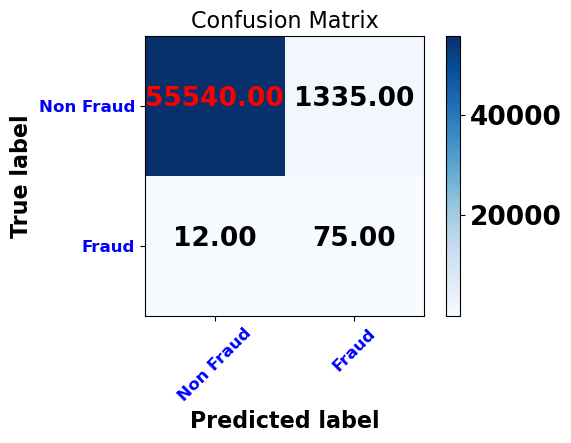

In [15]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud', 'Fraud'], title='Confusion Matrix')

In [16]:
# Sınıflandırma Raporu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.86      0.10        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



### SMOTE Oversampling
Overfitting’i önlemek için azınlık sınıfından sentetik örnekler oluşturulması.

In [17]:
# smote'dan önce eğitim setindeki sınıf sayısı
y_train.value_counts()

0    227440
1       405
Name: Class, dtype: int64

In [18]:
# SMOTE uygulaması(eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)


In [19]:
# SMOTE'dan sonra eğitim setinin sınıf sayısı
y_smote.value_counts()

0    227440
1    227440
Name: Class, dtype: int64

In [20]:
# Modelin eğitilmesi ve başarı oranı
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.975%


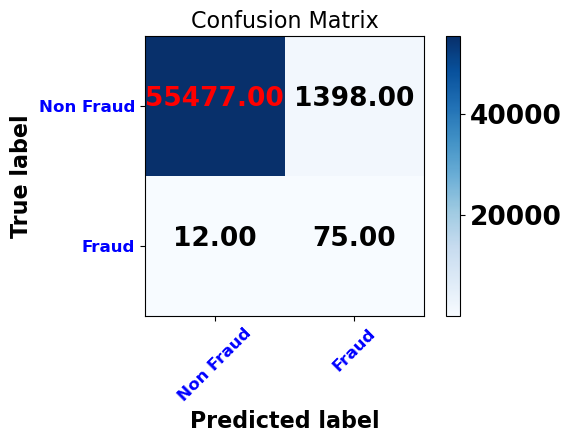

In [21]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud', 'Fraud'], title='Confusion Matrix')

In [22]:
# Sınıflandırma Raporu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.86      0.10        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



### Undersampling
- Çoğunluk sınıfına ait örneklerin çıkarılmasıyla veri setini dengeleme tekniğidir. 
- Büyük veri setine sahip olunduğunda kullanılabilir. 
- Elimizdeki veri seti büyük olmadığı için verimli sonuçlar alınmayacaktır. 

#### Random Undersampling:

- Çıkarılan örnekler rastgele seçilir.
- Büyük veri setine sahipseniz bu tekniği kullanabilirsiniz.
- Rastgele seçimden dolayı bilgi kaybı yaşanabilir.

In [23]:
# random undersampling'den önce eğitim setindeki sınıf sayısı
y_train.value_counts()

0    227440
1       405
Name: Class, dtype: int64

In [24]:
from imblearn.under_sampling import RandomUnderSampler
# transform the dataset
ranUnSample = RandomUnderSampler()
X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_train, y_train)

In [25]:
# Random undersampling sonra
y_ranUnSample.value_counts()

0    405
1    405
Name: Class, dtype: int64